In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#build an empty matrix to save frequency
freqency_matrix=[]
real_matrix=[]
imaginary_matrix=[]
Time_matrix=[]
Time=[]
new_Time=[]
t=[]
Time_seconds=[]

In [4]:
#build a matrix to save time,frequency,Real Resistance,imaginary Resistance
number_file=0
path ='*.txt'
files=glob.glob(path)
for file in files:
    number_file=number_file+1
    df = pd.read_csv(file,skiprows=18,sep='\s+')
    time=pd.read_csv(file)
    myList = []
    with open(file) as fp:
        for i in range(7):
            line=fp.readline()
            if i==0:
                myList.append(line[20:])
            if i==6:
                myList.append(line[25:])
    freqency=df.iloc[:,1]
    real=df.iloc[:,2]
    imaginary=df.iloc[:,3]
    freqency_matrix.append(freqency)
    real_matrix.append(real)
    imaginary_matrix.append(imaginary)
    Time_matrix.append(myList)
   

In [5]:
# caculate the time
for i in range(number_file):
    T=Time_matrix[i][0][-12:-1]+' '+Time_matrix[i][1][:-1]
    Time.append(T)
for i in range(number_file):
    a=Time[i]
    c = a.replace('JAN','01').replace('FEB','02').replace('MAR','03').replace('APR','04').replace('MAY','05').replace('JUN','06').replace('JUL','07').replace('AUG','08').replace('SEP','09').replace('OCT','10').replace('NOV','11').replace('DEC','12')
    new_Time.append(c)
from datetime import datetime
from datetime import timedelta
for i in range(number_file):
    a=datetime.strptime(new_Time[i],"%m,%d.%Y %H:%M:%S")
    t.append(a)
T=[]
for i in range(number_file):
    a=t[i]-min(t)
    T.append(a)
for i in range(number_file):
    a=timedelta.total_seconds(T[i])
    Time_seconds.append(a)

In [6]:
#Time_seconds

In [7]:
Data_matrix=[]
D0=[]
D1=[]
D2=[]
D3=[]
for i in range(number_file):
    X = freqency_matrix[i] 
    Y = real_matrix[i]
    Z = imaginary_matrix[i]
    for j in range(len(X)):
        fre = X[j]
        real = Y[j]
        ima = Z[j]
        for k in range(number_file):
            try:
                D0.extend(fre)
                D2.extend(real)
                D3.extend(ima)
            except TypeError:
                D0.append(fre)
                D2.append(real)
                D3.append(ima)


In [8]:
print(len(D0))
print(len(D1))
print(len(D2))
print(len(D3))

124280
0
124280
124280


In [9]:
# 3-d plot

In [10]:
time_duplicate = len(imaginary_matrix[1])*number_file

In [11]:
Dd1 = np.tile(Time_seconds,time_duplicate)

In [12]:
D1=Dd1

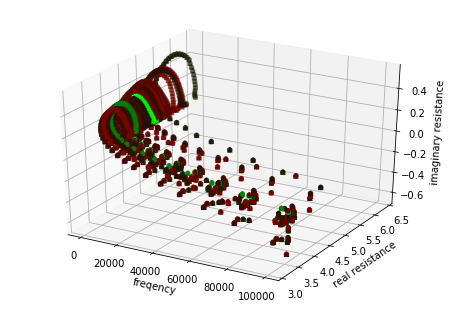

In [13]:
fig = plt.figure()
ax = Axes3D(fig)

for i in range(1, number_file):
    X = freqency_matrix[i]
    Y = real_matrix[i]
    Z = imaginary_matrix[i]
    for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
        ax.scatter(X,Y,-Z, c=(0.01*i, 1/i, 0.04/i), marker=m)

ax.set_xlabel('freqency')
ax.set_ylabel('real resistance')
ax.set_zlabel('imaginary resistance')
plt.show()

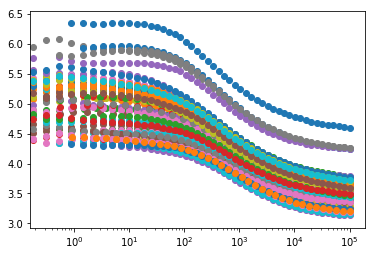

In [14]:
fig = plt.figure()
ax = plt.gca()

for i in range(number_file): 
    X = freqency_matrix[i]
    Y = real_matrix[i]
    Z = imaginary_matrix[i]
    ax.scatter(X,Y)
ax.set_xscale('log')
plt.show()

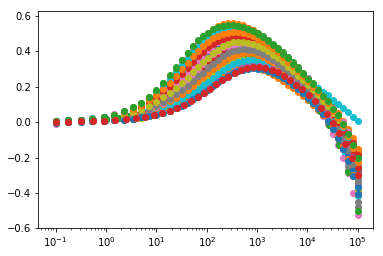

In [60]:
fig = plt.figure()
ax = plt.gca()

for i in range(number_file): 
    X = freqency_matrix[i]
    Y = real_matrix[i]
    Z = imaginary_matrix[i]
    ax.scatter(X,-Z)
ax.set_xscale('log')
plt.show()


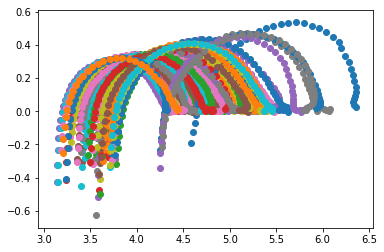

In [18]:
fig = plt.figure()
ax = plt.gca()

for i in range(number_file): 
    X = freqency_matrix[i]
    Y = real_matrix[i]
    Z = imaginary_matrix[i]
    ax.scatter(Y,-Z)
#ax.set_xscale('log')
plt.show()

In [61]:
Data_matrix=[D0,D1,D2,D3]

In [71]:
fh=open("zyc2.txt","w")
for i in range (len(D0)):
    lines_of_text=[] 
    fh.write(str(D0[i])+'\t')#+"    "
    fh.write(str(D1[i])+'\t')#+"    ");
    fh.write(str(D2[i])+'\t')#+"    ")
    fh.write(str(D3[i])+'\t')
    fh.write("\n")
fh.close()

In [20]:
print(number_file)

52
